In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# graph style
sns.set(style="whitegrid", font_scale=1.2)

# read data
df = pd.read_excel("Dataset.xlsx", sheet_name=0)

df.head()

,student_id,name,class,study,gpa,greek,off_campus,distance_to_campus,gender,sprinklered,coverage,claim_id,amount,risk_tier,holdout
0,1,"Saiz, Leslie",Junior,Humanities,1.203913,Non-greek,On campus,0.0,Male,True,Additional Living Expense,0,0.0,2,False
1,1,"Saiz, Leslie",Junior,Humanities,1.203913,Non-greek,On campus,0.0,Male,True,Guest Medical,0,0.0,2,False
2,1,"Saiz, Leslie",Junior,Humanities,1.203913,Non-greek,On campus,0.0,Male,True,Liability,0,0.0,2,False
3,1,"Saiz, Leslie",Junior,Humanities,1.203913,Non-greek,On campus,0.0,Male,True,Personal Property,0,0.0,2,False
4,2,"Reddy, Dawna",Junior,Science,0.609616,Non-greek,On campus,0.0,Female,True,Additional Living Expense,0,0.0,2,False


In [27]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40071 entries, 0 to 40070
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          40071 non-null  int64  
 1   name                40071 non-null  object 
 2   class               40071 non-null  object 
 3   study               40071 non-null  object 
 4   gpa                 40071 non-null  float64
 5   greek               40071 non-null  object 
 6   off_campus          40071 non-null  object 
 7   distance_to_campus  40071 non-null  float64
 8   gender              40071 non-null  object 
 9   sprinklered         40071 non-null  bool   
 10  coverage            40071 non-null  object 
 11  claim_id            40071 non-null  int64  
 12  amount              40071 non-null  float64
 13  risk_tier           40071 non-null  int64  
 14  holdout             40071 non-null  bool   
dtypes: bool(2), float64(3), int64(3), object(7)
memory us

,student_id,name,class,study,gpa,greek,off_campus,distance_to_campus,gender,sprinklered,coverage,claim_id,amount,risk_tier,holdout
count,40071.000000,40071,40071,40071,40071.000000,40071,40071,40071.000000,40071,40071,40071,40071.000000,40071.000000,40071.000000,40071
unique,NaN,9955,5,4,NaN,2,2,NaN,4,2,4,NaN,NaN,NaN,2
top,NaN,"Lee, Alexandria",Sophomore,Business,NaN,Non-greek,On campus,NaN,Male,True,Personal Property,NaN,NaN,NaN,False
freq,NaN,8,9122,10357,NaN,32176,26048,NaN,18124,28213,10051,NaN,NaN,NaN,32056
mean,5001.084051,NaN,NaN,NaN,2.330918,NaN,NaN,1.391481,NaN,NaN,NaN,41.308927,212.491329,1.876594,NaN
std,2887.122103,NaN,NaN,NaN,0.843613,NaN,NaN,2.953116,NaN,NaN,NaN,220.005701,2139.764547,0.874032,NaN
min,1.000000,NaN,NaN,NaN,0.041503,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,2501.000000,NaN,NaN,NaN,1.736911,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
50%,5001.000000,NaN,NaN,NaN,2.432251,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,2.000000,NaN
75%,7501.500000,NaN,NaN,NaN,2.993791,NaN,NaN,1.332187,NaN,NaN,NaN,0.000000,0.000000,3.000000,NaN


In [28]:
df.isna().sum()
df.isna().mean().round(4)

student_id            0.0
name                  0.0
class                 0.0
study                 0.0
gpa                   0.0
greek                 0.0
off_campus            0.0
distance_to_campus    0.0
gender                0.0
sprinklered           0.0
coverage              0.0
claim_id              0.0
amount                0.0
risk_tier             0.0
holdout               0.0
dtype: float64

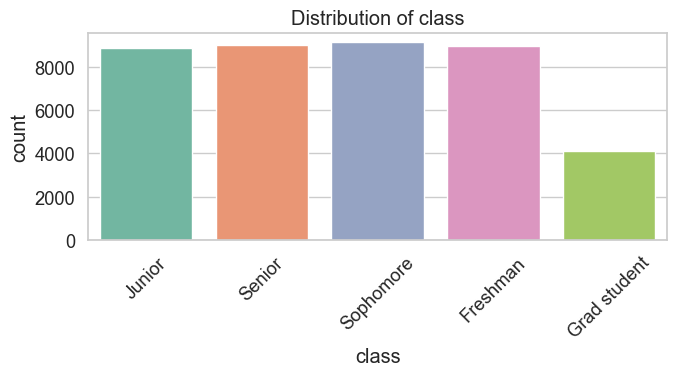

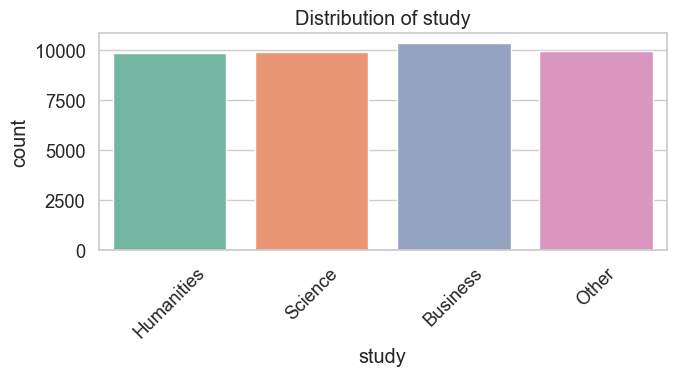

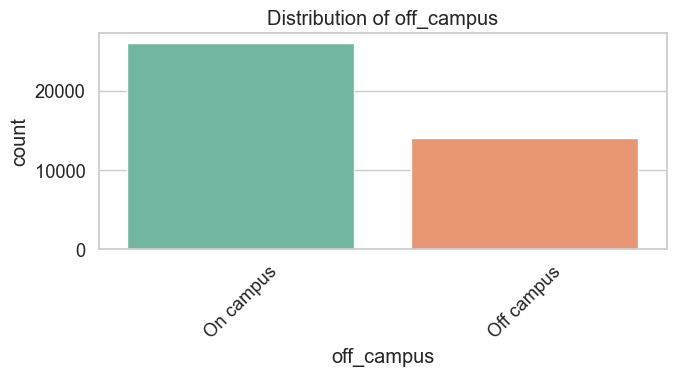

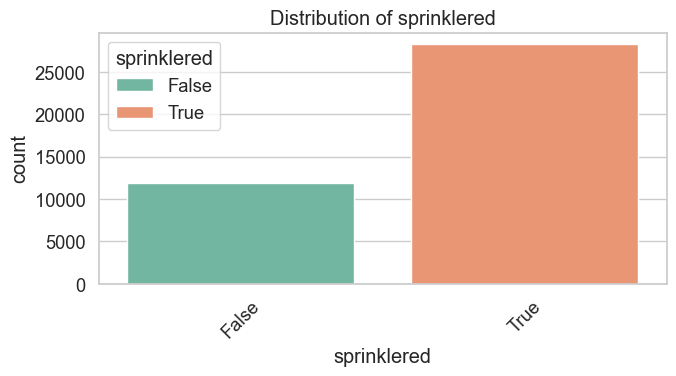

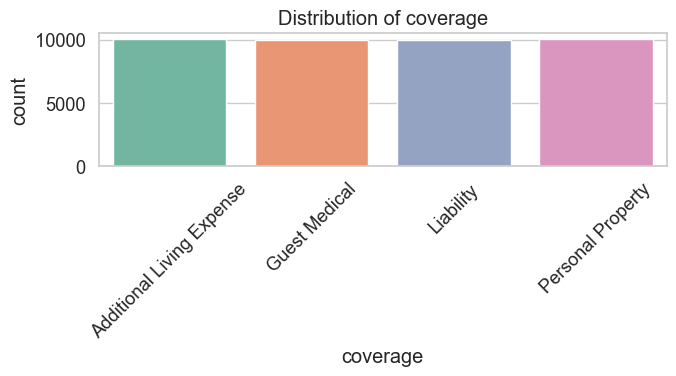

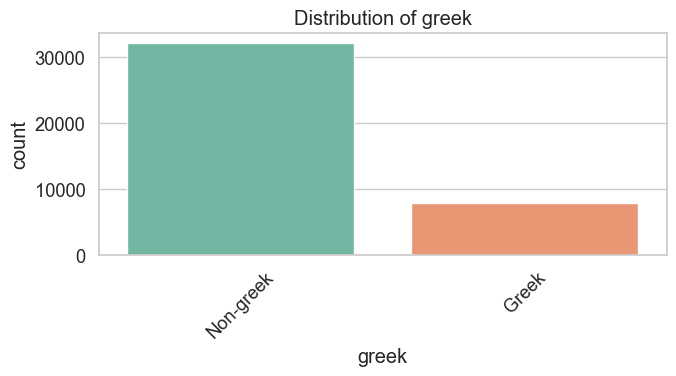

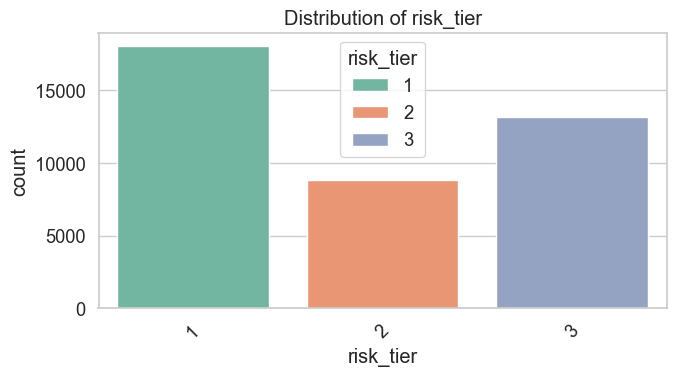

In [29]:
categorical_vars = ["class", "study", "off_campus", 
                    "sprinklered", "coverage", "greek", "risk_tier"]
                    
for col in categorical_vars:
    plt.figure(figsize=(7,4))
    
    sns.countplot(data=df, x=col, hue=col ,palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

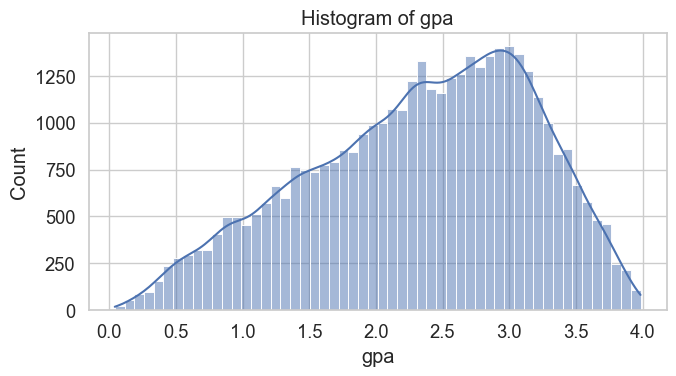

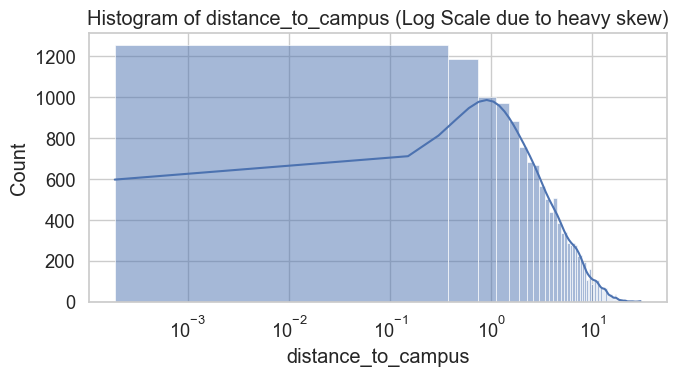

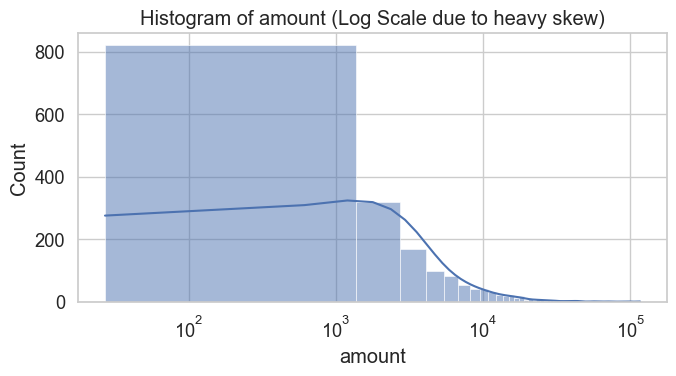

In [30]:
numeric_vars = ["gpa", "distance_to_campus", "amount"]

for col in numeric_vars:
    plt.figure(figsize=(7,4))

    # auto-detect heavy skew
    skew = df[col].skew()
    data = df[col].dropna()

    if skew > 2:
        # heavy tail → use log scale
        sns.histplot(data[data > 0], kde=True)
        plt.xscale("log")
        plt.title(f"Histogram of {col} (Log Scale due to heavy skew)")
    else:
        sns.histplot(data, kde=True)
        plt.title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()


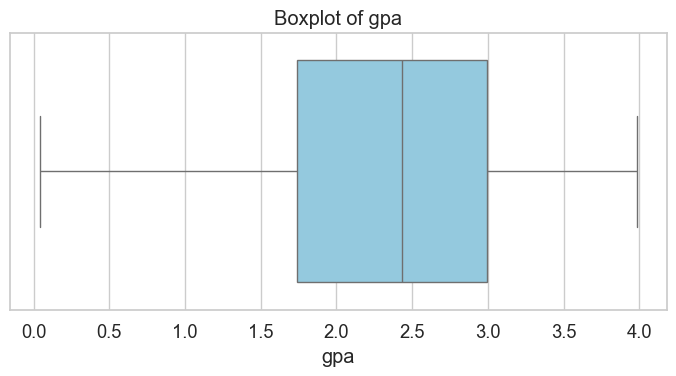

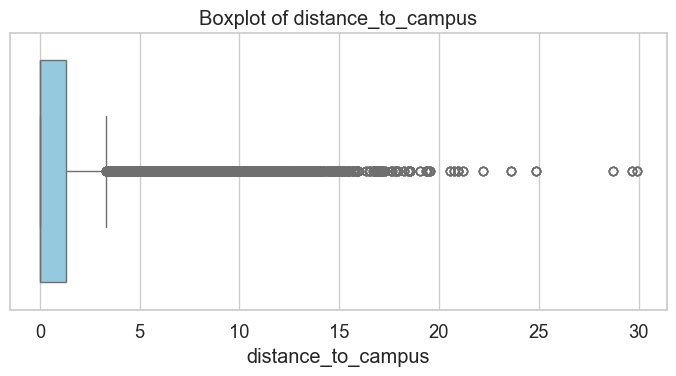

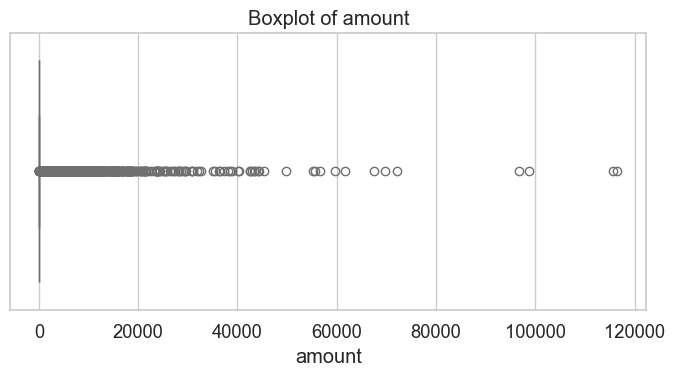

In [31]:
for col in numeric_vars:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

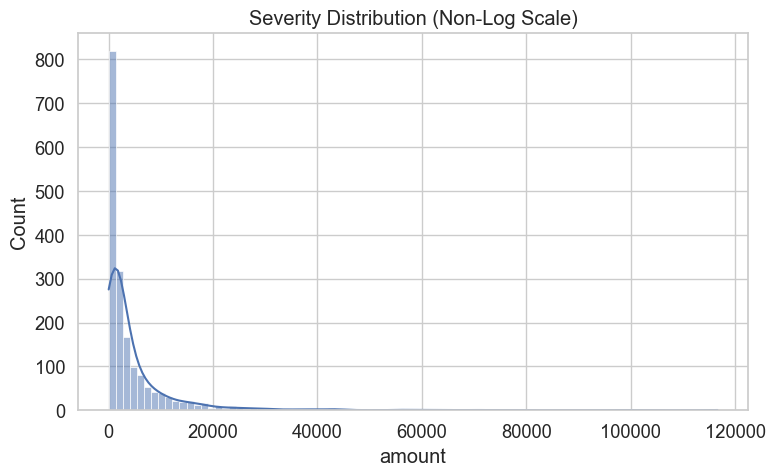

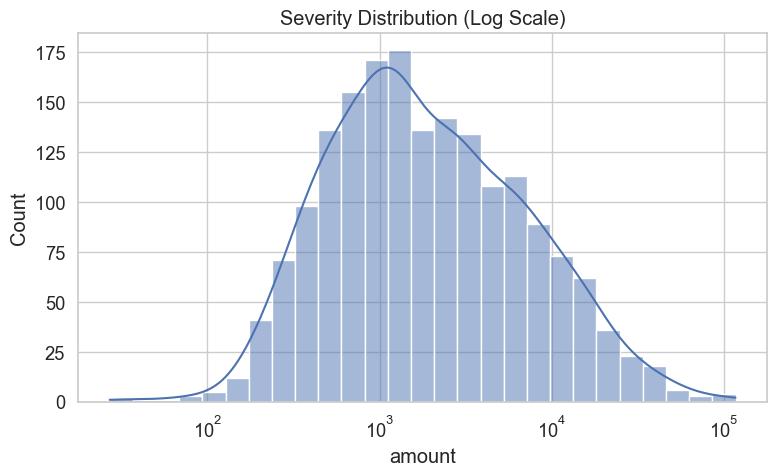

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df["amount"][df["amount"] > 0], log_scale=False, kde=True)
plt.title("Severity Distribution (Non-Log Scale)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["amount"][df["amount"] > 0], log_scale=True, kde=True)
plt.title("Severity Distribution (Log Scale)")
plt.tight_layout()
plt.show()

In [33]:
# 10 largest amounts
df.nlargest(10, "amount")

,student_id,name,class,study,gpa,greek,off_campus,distance_to_campus,gender,sprinklered,coverage,claim_id,amount,risk_tier,holdout
19763,4934,"Cuevas, Andrew",Senior,Other,1.773250,Greek,Off campus,2.183951,Other,False,Guest Medical,907,116563.40050,3,False
26067,6507,"Reyes, Natasha",Senior,Humanities,1.580658,Greek,Off campus,0.897933,Male,False,Guest Medical,1206,115617.26310,3,False
12064,3012,"Garcia, Maria",Junior,Other,1.581343,Greek,Off campus,0.572685,Male,False,Guest Medical,548,98833.34325,2,False
6609,1650,"Blackwater, Valerie",Senior,Other,2.368108,Greek,Off campus,5.033935,Female,False,Guest Medical,311,96690.39661,3,False
34186,8533,"Rodearmel, Kari",Sophomore,Humanities,0.484885,Greek,On campus,0.000000,Female,True,Guest Medical,1565,72168.87228,1,False
26591,6638,"Phipps, Jasmine",Sophomore,Business,2.698631,Greek,Off campus,2.336662,Male,False,Guest Medical,1232,69814.30042,1,True
18621,4649,"Phillips, Devin",Sophomore,Business,2.889526,Greek,On campus,0.000000,Male,False,Guest Medical,853,67532.37859,1,False
12220,3051,"Glover III, Marcellus",Senior,Other,1.494177,Greek,Off campus,2.198054,Female,True,Guest Medical,557,61755.92962,3,False
8791,2195,"Bhatt, Tmorchi",Junior,Humanities,1.363301,Greek,On campus,0.000000,Female,True,Guest Medical,404,59593.96708,2,False
23008,5744,"Mcdaniel, Ashley",Sophomore,Science,1.608157,Greek,Off campus,4.566484,Male,True,Guest Medical,1053,56552.89921,1,False


In [34]:
df["amount"].quantile([0.90, 0.95, 0.99, 0.999])

0.900        0.000000
0.950        0.000000
0.990     5619.950984
0.999    29046.508517
Name: amount, dtype: float64

C:\Users\ziang\AppData\Local\Temp\ipykernel_27512\2753604834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="coverage", y="amount", palette="Set3")


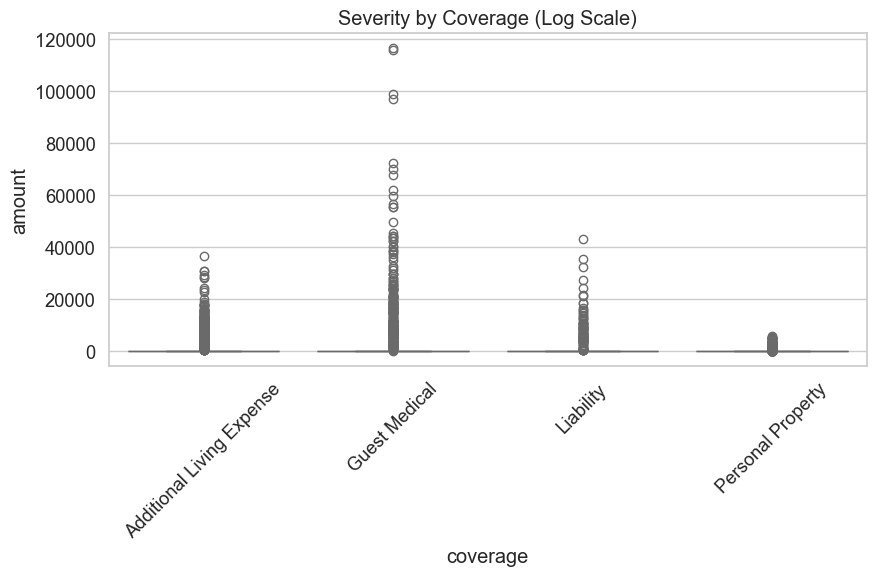

In [35]:
# severity by coverage
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x="coverage", y="amount", palette="Set3")
# plt.yscale("log")
plt.title("Severity by Coverage (Log Scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

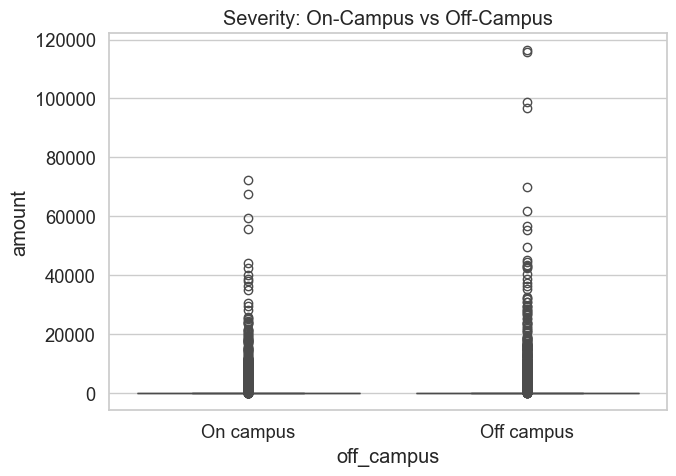

In [36]:
# Severity: On-campus vs Off-campus
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="off_campus", y="amount")
# plt.yscale("log")
plt.title("Severity: On-Campus vs Off-Campus")
plt.tight_layout()
plt.show()

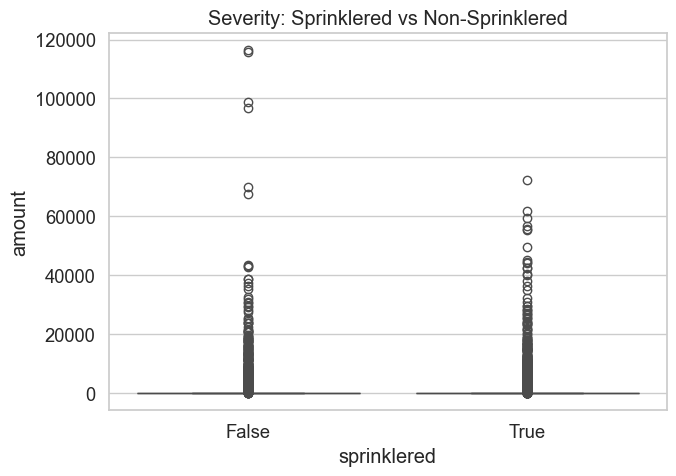

In [37]:
# Severity: Sprinklered vs Non-Sprinklered
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="sprinklered", y="amount")
# plt.yscale("log")
plt.title("Severity: Sprinklered vs Non-Sprinklered")
plt.tight_layout()
plt.show()

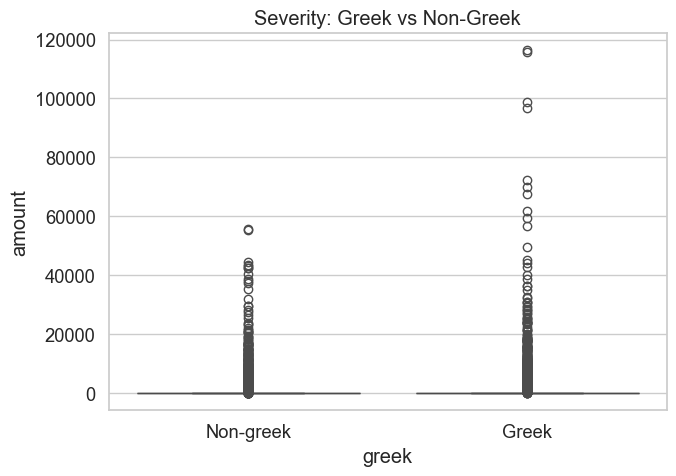

In [38]:
# Severity: Greek vs Non-Greek
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="greek", y="amount")
# plt.yscale("log")
plt.title("Severity: Greek vs Non-Greek")
plt.tight_layout()
plt.show()

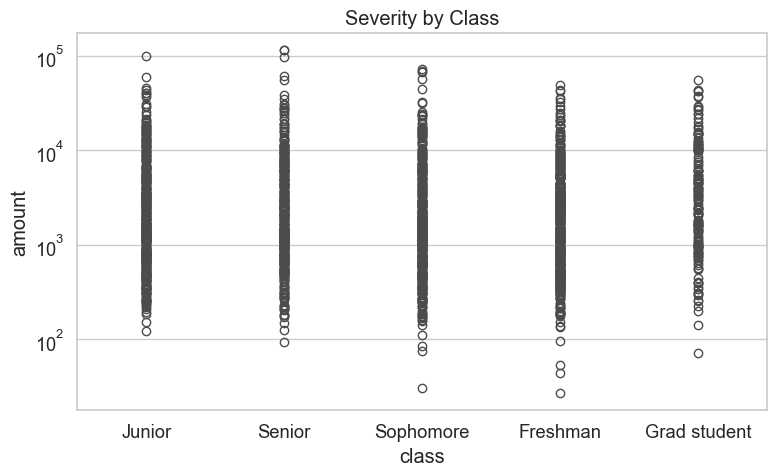

In [39]:
# Severity by Class
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="class", y="amount")
plt.yscale("log")
plt.title("Severity by Class")
plt.tight_layout()
plt.show()

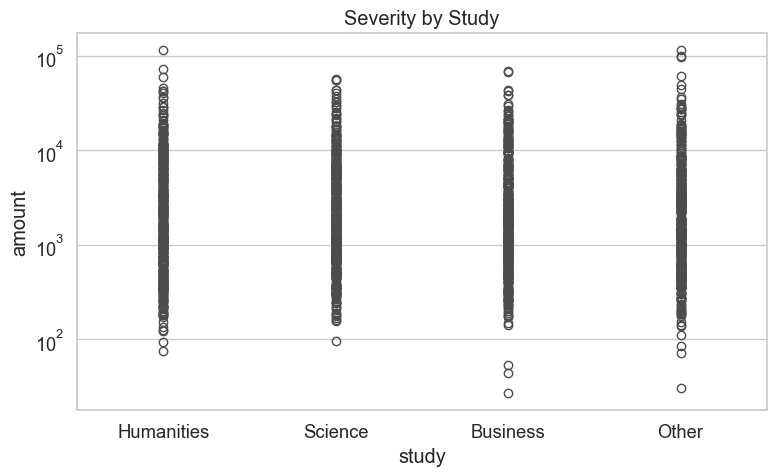

In [40]:
# Severity by Study
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="study", y="amount")
plt.yscale("log")
plt.title("Severity by Study")
plt.tight_layout()
plt.show()

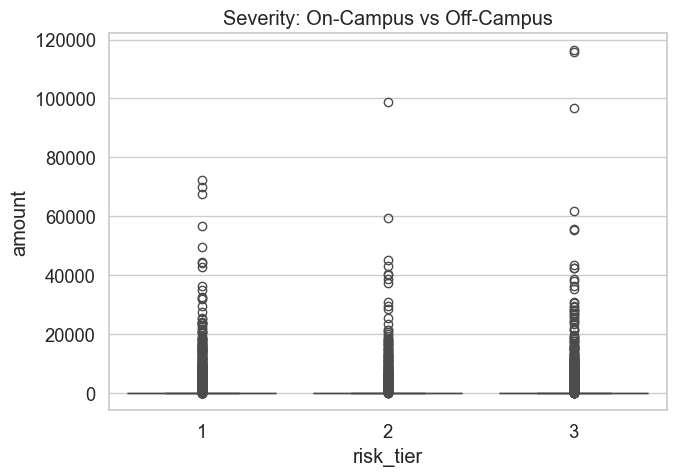

In [41]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="risk_tier", y="amount")
# plt.yscale("log")
plt.title("Severity: On-Campus vs Off-Campus")
plt.tight_layout()
plt.show()

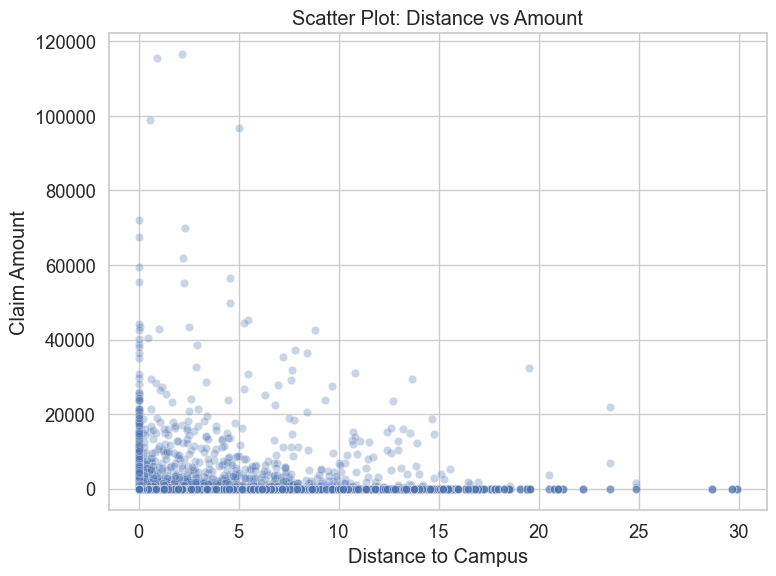

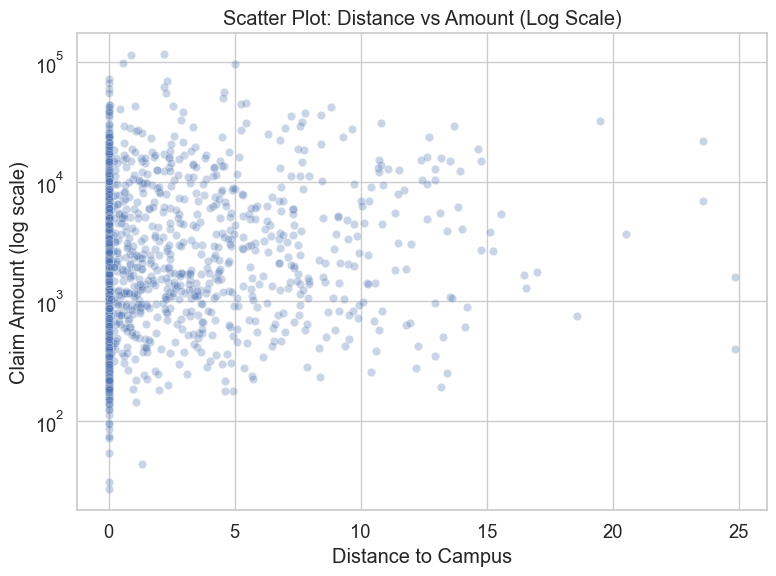

C:\Users\ziang\AppData\Local\Temp\ipykernel_27512\2983205872.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="distance_band", y="amount", palette="Set3")


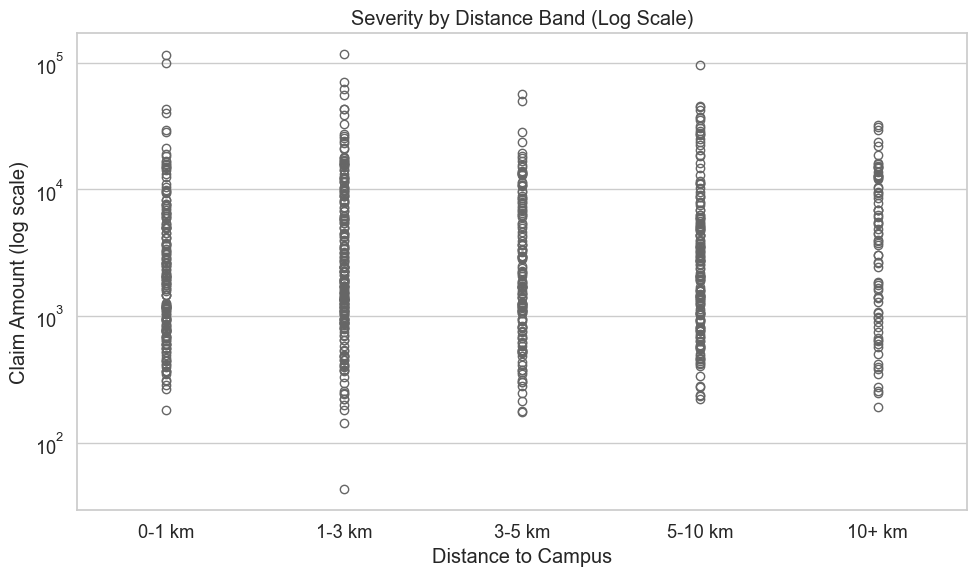

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="distance_to_campus", y="amount", alpha=0.3)
plt.title("Scatter Plot: Distance vs Amount")
plt.xlabel("Distance to Campus")
plt.ylabel("Claim Amount")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df[df["amount"] > 0], 
                x="distance_to_campus", 
                y="amount", alpha=0.3)
plt.yscale("log")
plt.title("Scatter Plot: Distance vs Amount (Log Scale)")
plt.xlabel("Distance to Campus")
plt.ylabel("Claim Amount (log scale)")
plt.tight_layout()
plt.show()


df["distance_band"] = pd.cut(
    df["distance_to_campus"],
    bins=[0,1,3,5,10,50],
    labels=["0-1 km", "1-3 km", "3-5 km", "5-10 km", "10+ km"]
)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="distance_band", y="amount", palette="Set3")
plt.yscale("log")
plt.title("Severity by Distance Band (Log Scale)")
plt.xlabel("Distance to Campus")
plt.ylabel("Claim Amount (log scale)")
plt.tight_layout()
plt.show()


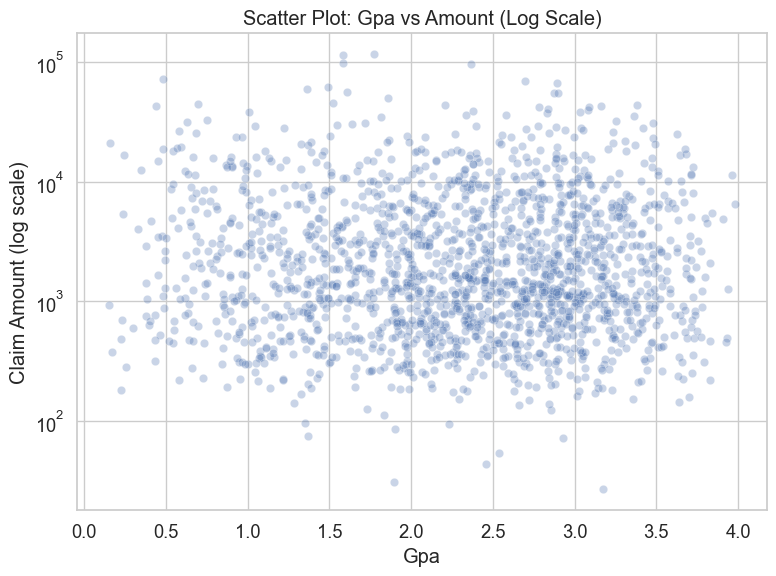

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df[df["amount"] > 0], 
                x="gpa", 
                y="amount", alpha=0.3)
plt.yscale("log")
plt.title("Scatter Plot: Gpa vs Amount (Log Scale)")
plt.xlabel("Gpa")
plt.ylabel("Claim Amount (log scale)")
plt.tight_layout()
plt.show()

In [44]:
# Overall claim frequency
overall_freq = (df["claim_id"] != 0).mean()
print("\nOverall Claim Frequency:", round(overall_freq, 4))

# Frequency by Coverage
df["Has_claim"] = (df["claim_id"] != 0)
freq_by_cov = df.groupby("coverage")["Has_claim"].mean()


Overall Claim Frequency: 0.0454


In [45]:
df["amount"].describe()
df.groupby("coverage")["amount"].agg(["mean", "median", "max"])

,mean,median,max
coverage,,,
Additional Living Expense,290.666642,0.0,36503.680280
Guest Medical,386.900449,0.0,116563.400500
Liability,73.741081,0.0,42915.494470
Personal Property,99.040895,0.0,5863.112026


In [46]:
# Get top 50 largest losses
top50 = df.nlargest(50, "amount")[["amount", "risk_tier"]]

print("===== Top 50 Largest Losses with Risk Tier =====")
display(top50)

# Count how many are in each tier
print("===== Distribution of Risk Tier in Top 50 Losses =====")
display(top50["risk_tier"].value_counts())

# 超过一半的大额损失没有被放到 Tier 3  上面的散点图也显示出类似的趋势，说明风险分层在区分大额损失方面效果不佳。
# 这里的risk_tier似乎并没有很好地反映出实际的风险水平，可能需要重新评估分层标准或引入更多的变量来改进风险评估模型。


===== Top 50 Largest Losses with Risk Tier =====


,amount,risk_tier
19763,116563.40050,3
26067,115617.26310,3
12064,98833.34325,2
6609,96690.39661,3
34186,72168.87228,1
26591,69814.30042,1
18621,67532.37859,1
12220,61755.92962,3
8791,59593.96708,2
23008,56552.89921,1


===== Distribution of Risk Tier in Top 50 Losses =====


risk_tier
3    24
1    15
2    11
Name: count, dtype: int64

C:\Users\ziang\AppData\Local\Temp\ipykernel_27512\3279888162.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
C:\Users\ziang\AppData\Local\Temp\ipykernel_27512\3279888162.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20)


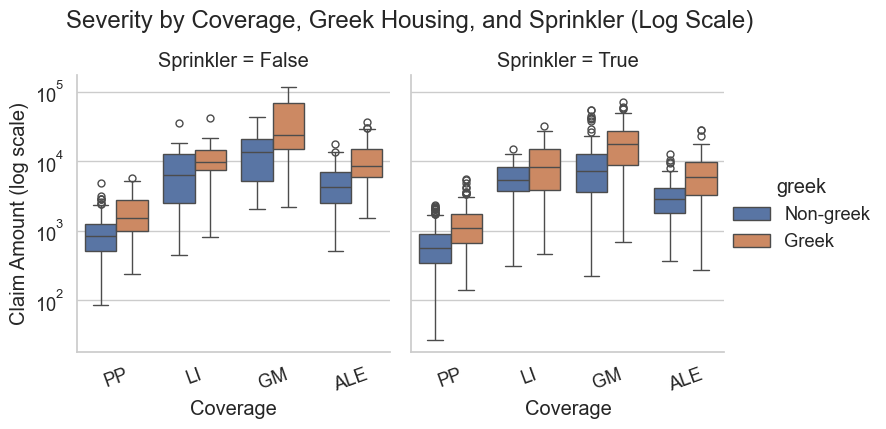

In [ ]:
# ensure df_loss exists
df_loss = df[df["amount"] > 0].copy()
df_loss["coverage_short"] = df_loss["coverage"].replace({
    "Personal Property": "PP",
    "Liability": "LI",
    "Guest Medical": "GM",
    "Additional Living Expense": "ALE"
})

sns.set(style="whitegrid", font_scale=1.2)

g = sns.catplot(
    data=df_loss,
    x="coverage_short",
    y="amount",
    hue="greek",
    col="sprinklered",
    kind="box",
    height=4,
    aspect=1,
    showfliers=True
)

g.set(yscale="log")
g.set_axis_labels("Coverage", "Claim Amount (log scale)")
g.set_titles("Sprinkler = {col_name}")

# Rotate x labels
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.suptitle("Severity by Coverage, Greek Housing, and Sprinkler (Log Scale)", y=1.05)
plt.show()

